In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [28]:
file_path = r"D:\Main_projects_folder\customer churn\prediction_data.xlsx"

In [29]:
sheet_name  = 'vw_ChurnData'

In [30]:
data  = pd.read_excel(file_path,sheet_name = sheet_name)

In [31]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,Stayed,others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,Stayed,others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,Stayed,others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,Stayed,others,Others


In [32]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [34]:
data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,Stayed,others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,Stayed,others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,Stayed,others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,Stayed,others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,No,Bank Withdrawal,65.199997,3687.850098,0.00,0,87.779999,Stayed,others,Others
6003,99912-WES,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,...,No,Bank Withdrawal,19.650000,244.800003,0.00,0,430.690002,Stayed,others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,No,Bank Withdrawal,69.699997,69.699997,0.00,0,21.520000,Churned,Attitude,Attitude of service provider
6005,99942-TEL,Female,34,No,Telangana,0,34,NaN,Yes,Yes,...,No,Credit Card,70.900002,4677.100098,0.00,0,1880.020020,Stayed,others,Others


In [35]:
data = data.drop(['Customer_ID','Churn_Category','Churn_Reason','Streaming_Movies','Streaming_Music','Total_Refunds'],axis = 1)

'''now using encode techinque to encode all the categorical value to numerical value for making it understand by the machine learning model'''

#created a encode list to encode

col_to_encode = ["Gender","Married","State","Value_Deal","Phone_Service","Multiple_Lines","Internet_Service","Internet_Type",
                 "Online_Security", "Online_Backup", 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
                'Unlimited_Data', 'Contract', 'Paperless_Billing','Payment_Method'
                ]


#to encode

label_encoders = {}
for col in col_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   int32  
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   int32  
 3   State                        6007 non-null   int32  
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   6007 non-null   int32  
 7   Phone_Service                6007 non-null   int32  
 8   Multiple_Lines               6007 non-null   int32  
 9   Internet_Service             6007 non-null   int32  
 10  Internet_Type                6007 non-null   int32  
 11  Online_Security              6007 non-null   int32  
 12  Online_Backup                6007 non-null   int32  
 13  Device_Protection_

In [37]:
data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Streaming_TV,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,0,1,2,0,0,95.099998,6683.399902,0,631.719971,Stayed
1,1,51,0,15,5,9,4,1,0,1,...,0,0,0,1,0,49.150002,169.050003,10,122.370003,Churned
2,0,43,1,21,3,28,0,1,1,1,...,1,0,2,1,0,116.050003,8297.500000,110,1872.979980,Stayed
3,1,35,0,12,10,12,5,1,0,1,...,1,1,2,1,1,84.400002,5969.299805,0,219.389999,Stayed
4,1,75,1,17,12,27,1,1,0,1,...,1,0,2,1,1,72.599998,4084.350098,140,332.079987,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,39,0,12,2,14,5,1,1,1,...,0,1,0,0,0,65.199997,3687.850098,0,87.779999,Stayed
6003,0,60,1,21,11,26,3,1,0,0,...,0,0,1,0,0,19.650000,244.800003,0,430.690002,Stayed
6004,1,59,1,10,8,18,5,1,0,1,...,0,1,0,0,0,69.699997,69.699997,0,21.520000,Churned
6005,0,34,0,18,0,34,5,1,1,1,...,0,1,2,0,1,70.900002,4677.100098,0,1880.020020,Stayed


In [38]:
data["Customer_Status"] = data["Customer_Status"].map({'Stayed': 0, 'Churned': 1})

In [39]:
#split the data 

x = data.drop("Customer_Status",axis = 1)
y = data['Customer_Status']

In [40]:
#using train test split

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)

In [41]:
#intailize the model

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [42]:
# evaluating the model accuracy

y_pred = rf_model.predict(X_test)


#evalute the model
cm = confusion_matrix(Y_test,y_pred)
labels  = ["Predicted Negative","Predicted Positive"]
cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"], columns=labels)

print("\nConfusion Matrix:")
print(cm_df)
print("*"*300)
print("\nClassification Report: ")
print(classification_report(Y_test,y_pred))


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 795                  65
Actual Positive                 122                 220
************************************************************************************************************************************************************************************************************************************************************************************************************

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       860
           1       0.77      0.64      0.70       342

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



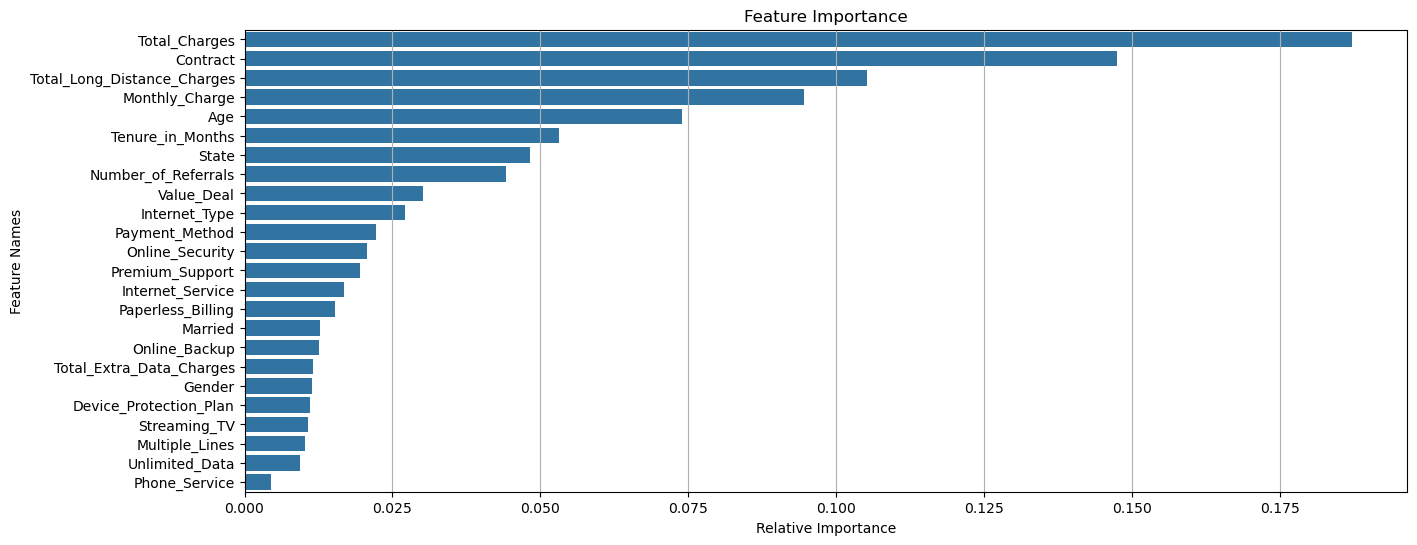

In [43]:
#feature selction for feature importance
#for checking the weight of the paramters contributing it to the prediction of the model.

importances  =rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#plotting the feature

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y = x.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.grid(axis ="x")
plt.show()

## Performing predict on new model


In [19]:
# # file location
# file_path_pred = r"D:\Main_projects_folder\customer churn\prediction_data.xlsx"

# #define the sheet name to read data from

# sheet_name_pred = "vw_JoinData"


# new_data = pd.read_excel(file_path_pred,sheet_name  = sheet_name_pred)

In [20]:
# new_data

In [21]:
# # retain the  original dataframe to preserve the uncoded columns
# original_new_data = new_data.copy()

# #Retain the customer id column
# customer_ids = new_data["Customer_ID"]

# #Drop columns 
# new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# #encode the categorical variables using the saved label encoders

# #created a encode list to encode

# col_to_encode1 = ["Gender","Married","State","Value_Deal","Phone_Service","Multiple_Lines","Internet_Service","Internet_Type",
#                  "Online_Security", "Online_Backup", 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
#                  'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing','Payment_Method'
#                 ]


# #to encode

# label_encoders = {}
# for col in col_to_encode1:
#     label_encoders[col] = LabelEncoder()
#     new_data[col] = label_encoders[col].fit_transform(new_data[col])

In [22]:
# new_data

In [23]:
# #make predictions

# new_predictions = rf_model.predict(new_data)

In [24]:
# new_predictions

In [25]:
# # Add precitions to the original data frame
# original_new_data["Customer_Status_Prediction"] = new_predictions

# #filter the dataframe to include only churned customers

# original_new_data = original_new_data[original_new_data['Customer_Status_Prediction'] == 1]

In [26]:
# #saving the results

# original_new_data.to_csv(r"D:\Main_projects_folder\customer churn\Predictions.csv",index = False)